In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../csv/SBER_101001_201001_1d.csv',
		delimiter=',',
		parse_dates=[[0,1]],
		index_col=0,
		names=['Date','Time','Open', 'High', 'Low', 'Close', 'Volume'],
		header=0,
		encoding='utf-8'
	)

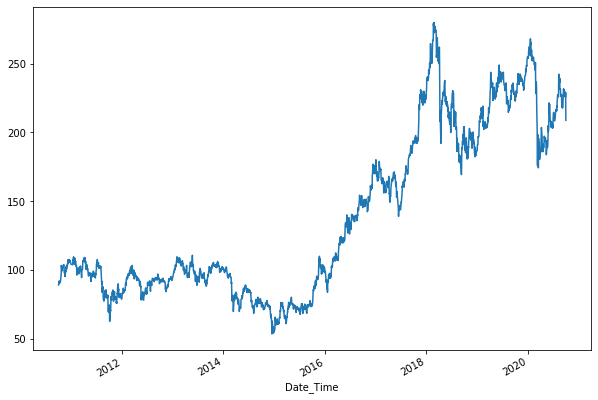

In [3]:
df['Close'].plot(figsize=(10,7))

# Подготовка данных

In [4]:
df['Buy'] = (df['Close']-df['Open'])/df['Open']
df['Sell'] = (df['Open']-df['Close'])/df['Open']

# Покупки после каждого закрытия вниз

In [5]:
df['Buy_1_Day'] = np.where(df['Buy'].shift(1)<0, df['Buy'], np.nan)
df['Equity_Buy_1_Day'] = df['Buy_1_Day'].cumsum().apply(np.exp)


# Продажа после каждого закрытия вверх

In [6]:
df['Sell_1_Day'] = np.where(df['Sell'].shift(1)<0, df['Sell'], np.nan)
df['Equity_Sell_1_Day'] = df['Sell_1_Day'].cumsum().apply(np.exp)

# Покупка и продажа вместе

In [7]:
df['Buysell'] = np.where(df['Buy'].shift(1)<0, df['Buy'], 0)
df['Buysell'] = np.where(df['Buy'].shift(1)>0, df['Sell'], 0)

In [8]:
df['Equity_Buysell_1_Day'] = df['Buysell'].cumsum().apply(np.exp)

# Покупка после двух подряд закрытий вниз

In [9]:
def calc_n_days(values, n):
    if (values[:n] < 0).all():
        return values[-1]
    else:
        return np.nan

In [10]:
df['Buy_2_Days'] = df['Buy'].rolling(3).apply(calc_n_days, args=(2,))
df['Equity_Buy_2_Days'] = df['Buy_2_Days'].cumsum().apply(np.exp)

# Продажа после двух подряд закрытий вверх

In [11]:
df['Sell_2_Days'] = df['Sell'].rolling(3).apply(calc_n_days, args=(2,))
df['Equity_Sell_2_Days'] = df['Sell_2_Days'].cumsum().apply(np.exp)

# Продажа и покупка вместе после двух дней подряд

In [12]:
def calc_n_days_buysell(values, n):
    if (values[:n] < 0).all():
        return values[-1]
    elif (values[:n] > 0).all():
        return -1*values[-1]
    else:
        return np.nan

In [13]:
df['Buysell_2_Days'] = df['Buysell'].rolling(3).apply(calc_n_days_buysell, args=(2,))
df['Equity_Buysell_2_Days'] = df['Buysell_2_Days'].cumsum().apply(np.exp)

# Покупка после трёх подряд закрытий вниз

In [14]:
df['Buy_3_Days'] = df['Buy'].rolling(4).apply(calc_n_days, args=(3,))
df['Equity_Buy_3_Days'] = df['Buy_3_Days'].cumsum().apply(np.exp)

# Продажа после трёх подряд закрытий вверх

In [15]:
df['Sell_3_Days'] = df['Sell'].rolling(4).apply(calc_n_days, args=(3,))
df['Equity_Sell_3_Days'] = df['Sell_3_Days'].cumsum().apply(np.exp)

# Покупка и продажа вместе после трёх дней

In [16]:
df['Buysell_3_Days'] = df['Buysell'].rolling(4).apply(calc_n_days_buysell, args=(3,))
df['Equity_Buysell_3_Days'] = df['Buysell_3_Days'].cumsum().apply(np.exp)

# Графики

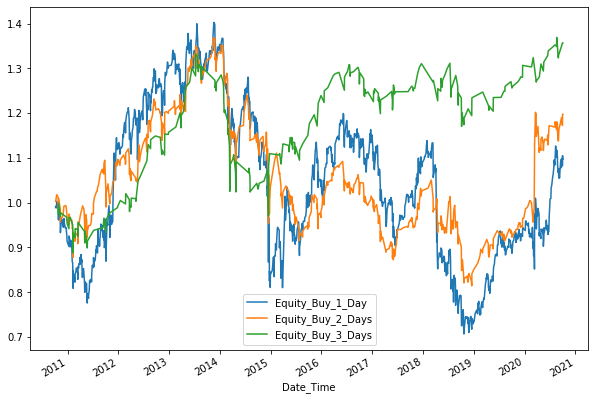

In [17]:
df[[
    'Equity_Buy_1_Day',
    'Equity_Buy_2_Days',
    'Equity_Buy_3_Days'
]].interpolate(method='index').plot(figsize=(10,7))

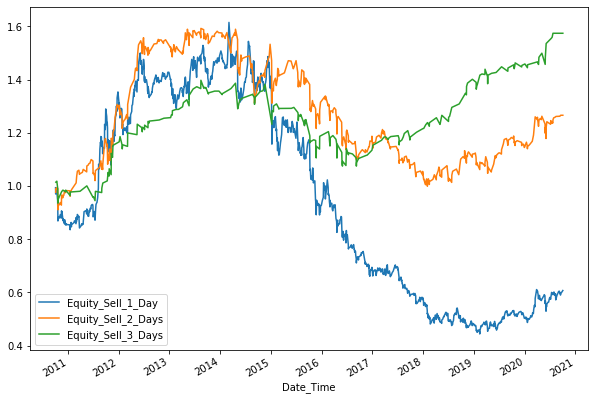

In [18]:
df[[
    'Equity_Sell_1_Day',
    'Equity_Sell_2_Days',
    'Equity_Sell_3_Days'
]].interpolate(method='index').plot(figsize=(10,7))

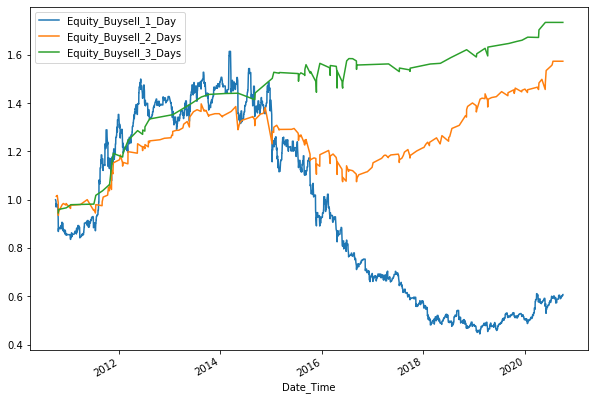

In [19]:
df[[
    'Equity_Buysell_1_Day',
    'Equity_Buysell_2_Days',
    'Equity_Buysell_3_Days'
]].interpolate(method='index').plot(figsize=(10,7))